In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Input

In [70]:
df=pd.read_csv("Admission_Predict.csv")

In [71]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [72]:
df=df.drop(columns=["Serial No."])

In [73]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [74]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [77]:
model = Sequential([
    Input(shape = (7,)),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(4, activation = 'relu'),
    Dense(1, activation = 'linear')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer="adam", loss="mse", metrics=["mae", "mse"])

In [92]:
info=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mae: 0.0480 - mse: 0.0041 - val_loss: 0.0042 - val_mae: 0.0468 - val_mse: 0.0042
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mae: 0.0477 - mse: 0.0041 - val_loss: 0.0045 - val_mae: 0.0458 - val_mse: 0.0045
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - mae: 0.0457 - mse: 0.0037 - val_loss: 0.0040 - val_mae: 0.0448 - val_mse: 0.0040
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mae: 0.0452 - mse: 0.0037 - val_loss: 0.0041 - val_mae: 0.0443 - val_mse: 0.0041
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mae: 0.0454 - mse: 0.0037 - val_loss: 0.0040 - val_mae: 0.0443 - val_mse: 0.0040
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mae: 0.0438 - mse: 0.0037 - val_loss: 0.0040 - val_mae: 0.0437 - val_mse: 0.0040
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - mae: 0.0467 - mse: 0.0038 - val_loss: 0.0043 - val_

In [93]:
y_pred=model.predict(X_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x12908c220> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [94]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7132832516035997


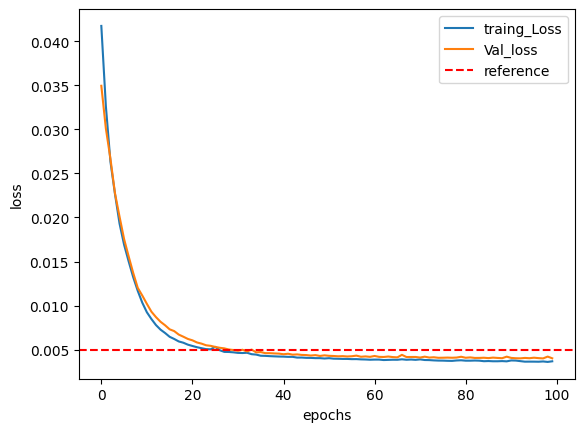

In [87]:
plt.plot(info.history['loss'],label='traing_Loss')
plt.plot(info.history['val_loss'],label='Val_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.axhline(y=0.005, color='r', linestyle='--', label='reference')
plt.legend()

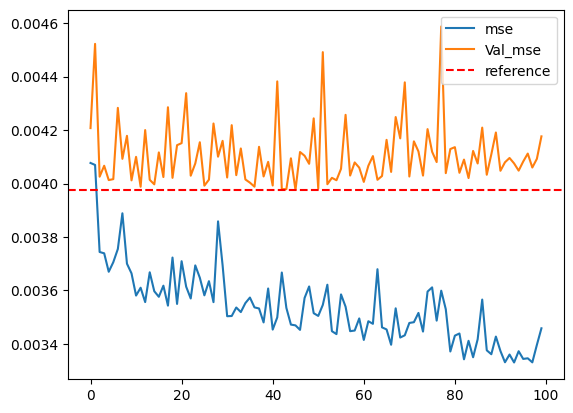

In [108]:
min_validation_loss=np.min(info.history['val_mse'])
plt.plot(info.history['mse'],label='mse')
plt.plot(info.history['val_mse'],label='Val_mse')
plt.axhline(y=min_validation_loss, color='r', linestyle='--', label='reference')
plt.legend()